<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [5]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [6]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [6]:
# Task 1: Become familiar with the dataset

print(boston_df.head())
boston_df.shape

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


(506, 14)

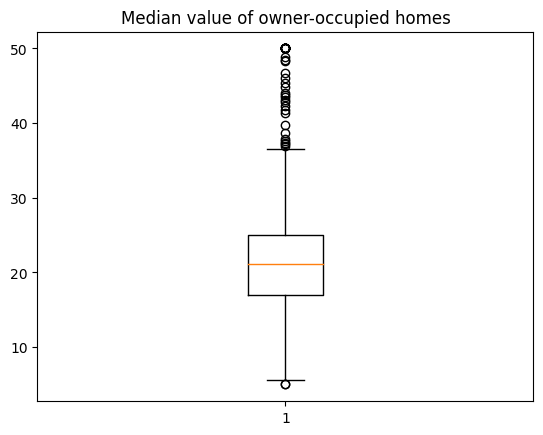

In [7]:
# Task 2: Generate Descriptive Statistics and Visualizations

# Task 2a: For the "Median value of owner-occupied homes" provide a boxplot

pyplot.boxplot(boston_df['MEDV'])
pyplot.title("Median value of owner-occupied homes")
pyplot.show()

Task 2a: The median is around 20 with 1st quartile with symmetry around it for the Inter Quartile range. However, there are a lot of outliers on the positive side.

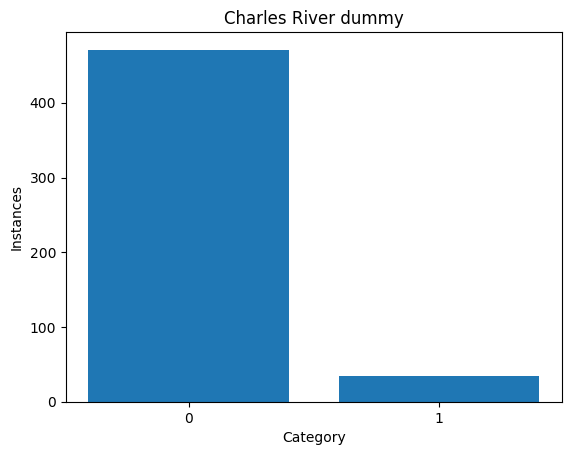

In [8]:
# Task 2b: Bar plot

pyplot.bar([0, 1], [boston_df['CHAS'].value_counts()[0], boston_df['CHAS'].value_counts()[1]])
pyplot.title("Charles River dummy")
pyplot.xlabel('Category')
pyplot.ylabel('Instances')
pyplot.xticks([0,1],['0','1'])
pyplot.show()

The number of houses that tracts river bounds are below 50 and that aren't above 450

In [9]:
#Task 2C

import numpy as np

boston_df['Age_Category'] = np.where(boston_df['AGE'] <=25,"35 years and younger",np.where(boston_df['AGE'] <70,"35 to 70 years","70 years and older")) 

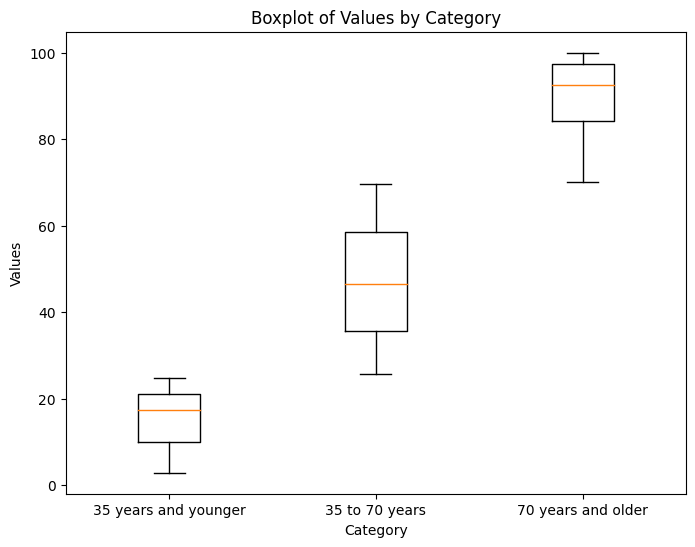

In [19]:
pyplot.figure(figsize=(8, 6))
categories_order = ["35 years and younger", "35 to 70 years", "70 years and older"]
pyplot.boxplot([boston_df[boston_df['Age_Category'] == cat]['AGE'] for cat in categories_order], labels=categories_order)
pyplot.title('Boxplot of Values by Category')
pyplot.xlabel('Category')
pyplot.ylabel('Values')
pyplot.show()

THe median for 35 years and younger is around 20 for 35-70 it is around 50 and for 70 years and older above 90.

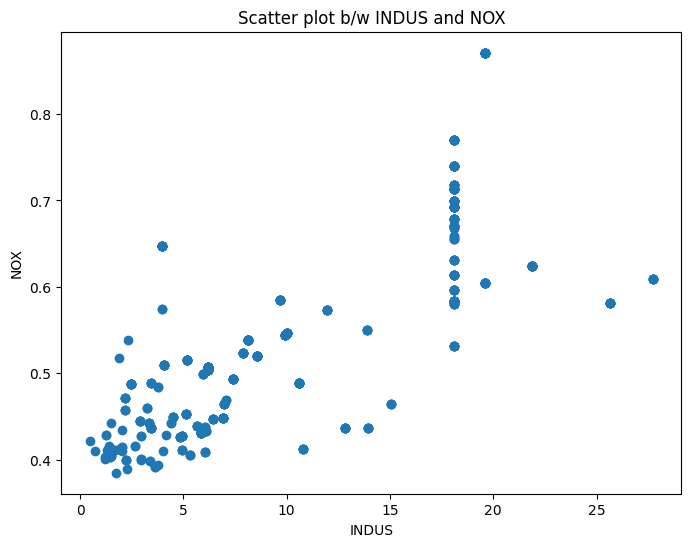

In [21]:
# Task 2D

pyplot.figure(figsize=(8, 6))
pyplot.scatter(boston_df['INDUS'],boston_df['NOX'])
pyplot.title('Scatter plot b/w INDUS and NOX')
pyplot.xlabel('INDUS')
pyplot.ylabel('NOX')
pyplot.show()

In [30]:
boston_df['PTRATIO'].max()

22.0

There seems to be a lose positive relationship between proportion of non retail business proportion and NOX levels. There seems to be a limit of non retail business porportion around 18% for a lot of points

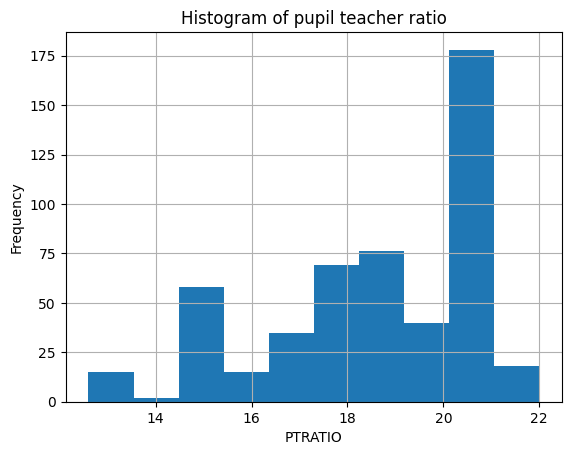

In [32]:
#Task 2e

boston_df['PTRATIO'].hist(bins=10)

pyplot.title('Histogram of pupil teacher ratio')
pyplot.xlabel('PTRATIO')
pyplot.ylabel('Frequency')

pyplot.show()

THe largest number of instances are of 20 to 21 Pupil Teacher Ratio with values of around 175

**Task 3 A**

H0 = Charles river does not have an impact on the MEDV of houses

Significance Level = 0.05

In [9]:
#Task 3a

#Splitting into 2 groups

charles_river_bound = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_river_bound = boston_df[boston_df['CHAS'] == 0]['MEDV']

# T-tests

t_stat , p_val = scipy.stats.ttest_ind(charles_river_bound,not_river_bound)


print("t-statistic:",t_stat)
print("p-value:",p_val)

t-statistic: 3.996437466090509
p-value: 7.390623170519905e-05


**Since the p-value is less than 0.05 we can reject the null hypothesis that the means of house prices are same. This indicates that there is signiicant difference in prices of homes bounded by the Charles river to those that are not**

In [10]:
print("Charles river bound prices:", charles_river_bound.mean(), "\nCharles river not bound prices:", not_river_bound.mean())

Charles river bound prices: 28.439999999999998 
Charles river not bound prices: 22.093842887473464


**Task 3 B**

H0: There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE) or post 1940

Significance Level = 0.05

Considering Census was carried out in 2020. This would result in properties of Age more than 80

In [16]:
#Performing Anova Test

f_stat,p_val = scipy.stats.f_oneway(boston_df[boston_df['AGE']>=80]['MEDV'], boston_df[boston_df['AGE']<80]['MEDV'])

print("f-statistic:",f_stat)
print("p-value:",p_val)

f-statistic: 70.44779821320425
p-value: 4.804129407443654e-16


**Since the p-value is less than 0.05 we can reject the null hypothesis that the means of house prices are same. This indicates that there is signiicant difference in prices of homes pre and post 1940**

**Task 3C**

H0: There is no correlation between NOx levels and non retail business proportion

Significance Level = 0.05


In [17]:
#Performing Pearson Correlation

pearson_correlation,p_val = scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'] )

print("Correlation Coefficient:",pearson_correlation)
print("p-value:",p_val)

Correlation Coefficient: 0.7636514469209192
p-value: 7.913361061210442e-98


**There is a significant correlation between Nitric oxide concentrations and proportion of non-retail business acres per town as we rejected Null hypothesis due to p-value being less than 0.05**

**The correlation is positive as indicated correlation cofficient of 0.76**

**Task 3D**

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

In [18]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model_1 = sm.OLS(y,X).fit()

print(model_1.summary())



                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        21:34:58   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

**The value of coefficient of DIS is 1.0916 and the p-value is significant at <0.05. Thus an additional weighted distance would increase the price by 1.0916*1000 $ i.e. USD 1091.6**